In [6]:
import pandas
print('pandas',pandas.__version__)

pandas 0.24.2


Query interface on the web: 

https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand

Preview the CSV

!head RollingSystemDemand_20190314_0043.csv

load CSV into Pandas using the default options

In [8]:
dframe = pandas.read_csv("RollingSystemDemand_20191012_1506.csv")
dframe.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20191001000000,22008.0
VD,20191001000500,22379.0
VD,20191001001000,22361.0
VD,20191001001500,22445.0
VD,20191001002000,22377.0


I don't like that Pandas is treating "VD" as the index, so I'm going to force the index to be numeric

In [9]:
#dataframe.reset_index() # not sure why this didn't work
dframe.index=range(len(dframe))
dframe.head()

,HDR,ROLLING SYSTEM DEMAND
0,20191001000000,22008.0
1,20191001000500,22379.0
2,20191001001000,22361.0
3,20191001001500,22445.0
4,20191001002000,22377.0


I don't like the column names, so I'm going to change those

In [10]:
dframe.columns=['time of measurement','demand level']

In [11]:
dframe.head()

,time of measurement,demand level
0,20191001000000,22008.0
1,20191001000500,22379.0
2,20191001001000,22361.0
3,20191001001500,22445.0
4,20191001002000,22377.0


I'm happy. Let's see what the plot looks like

In [12]:
import matplotlib
print('matplotlib',matplotlib.__version__)
import matplotlib.pyplot as plt

matplotlib 3.1.0


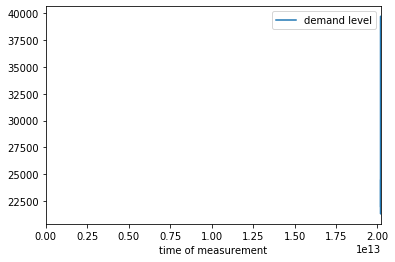

In [15]:
dframe.plot(x='time of measurement', y='demand level')
plt.show()

Hmm, those flat lines look unlikely. Also, the time axis needs some work. Switch to scatter plot

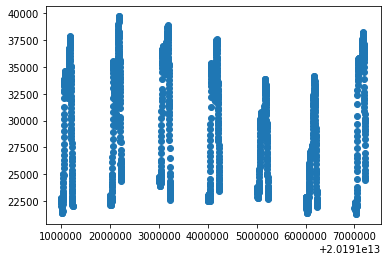

In [16]:
plt.scatter(dframe['time of measurement'], dframe['demand level'])
plt.show()

Switching to scatter plot confirms the lines are not actual data points. 

Also, need to convert 'time of measurement' column to datetime

In [11]:
from datetime import datetime

Before trying to force the column to a datetime, let's experiment with a single entry to confirm the method.

strptime = "string parse time"<BR>
strftime = "string format time"<BR>
    see <a href="http://strftime.org/">http://strftime.org/</a>

In [13]:
!head -n 3 RollingSystemDemand_20190314_0043.csv

HDR,ROLLING SYSTEM DEMAND
VD,20190301000000,27941
VD,20190301000500,28021


In [15]:
# see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior for details

# using the first entry from the output of !head above 
datetime_object = datetime.strptime('20190301000000', '%Y%m%d%H%M%S')
datetime_object.strftime('%Y-%m-%d %H:%M:%S') # print the result in a human readable format

'2019-03-01 00:00:00'

Conclusion: looks like the method works

Next, convert the entire column using that format

In [16]:
dframe['time of measurement'] = pandas.to_datetime(dframe['time of measurement'],
                                                   format='%Y%m%d%H%M%S')

ValueError: time data 2000 does not match format '%Y%m%d%H%M%S' (match)

I was making an assumption that the data type was string

Look at the type of the columns:

In [18]:
dframe.dtypes

time of measurement      int64
demand level           float64
dtype: object

Before converting the time column to datetime, first convert to string

In [19]:
dframe['time of measurement']=dframe['time of measurement'].to_string()

In [20]:
dframe['time of measurement'] = pandas.to_datetime(dframe['time of measurement'],
                                                   format='%Y%m%d%H%M%S')

ValueError: time data '0       20190301000000\n1       20190301000500\n2       20190301001000\n3       20190301001500\n4       20190301002000\n5       20190301002500\n6       20190301003000\n7       20190301003500\n8       20190301004000\n9       20190301004500\n10      20190301005000\n11      20190301005500\n12      20190301010000\n13      20190301010500\n14      20190301011000\n15      20190301011500\n16      20190301012000\n17      20190301012500\n18      20190301013000\n19      20190301013500\n20      20190301014000\n21      20190301014500\n22      20190301015000\n23      20190301015500\n24      20190301020000\n25      20190301020500\n26      20190301021000\n27      20190301021500\n28      20190301022000\n29      20190301022500\n30      20190301023000\n31      20190301023500\n32      20190301024000\n33      20190301024500\n34      20190301025000\n35      20190301025500\n36      20190301030000\n37      20190301030500\n38      20190301031000\n39      20190301031500\n40      20190301032000\n41      20190301032500\n42      20190301033000\n43      20190301033500\n44      20190301034000\n45      20190301034500\n46      20190301035000\n47      20190301035500\n48      20190301040000\n49      20190301040500\n50      20190301041000\n51      20190301041500\n52      20190301042000\n53      20190301042500\n54      20190301043000\n55      20190301043500\n56      20190301044000\n57      20190301044500\n58      20190301045000\n59      20190301045500\n60      20190301050000\n61      20190301050500\n62      20190301051000\n63      20190301051500\n64      20190301052000\n65      20190301052500\n66      20190301053000\n67      20190301053500\n68      20190301054000\n69      20190301054500\n70      20190301055000\n71      20190301055500\n72      20190301060000\n73      20190301060500\n74      20190301061000\n75      20190301061500\n76      20190301062000\n77      20190301062500\n78      20190301063000\n79      20190301063500\n80      20190301064000\n81      20190301064500\n82      20190301065000\n83      20190301065500\n84      20190301070000\n85      20190301070500\n86      20190301071000\n87      20190301071500\n88      20190301072000\n89      20190301072500\n90      20190301073000\n91      20190301073500\n92      20190301074000\n93      20190301074500\n94      20190301075000\n95      20190301075500\n96      20190301080000\n97      20190301080500\n98      20190301081000\n99      20190301081500\n100     20190301082000\n101     20190301082500\n102     20190301083000\n103     20190301083500\n104     20190301084000\n105     20190301084500\n106     20190301085000\n107     20190301085500\n108     20190301090000\n109     20190301090500\n110     20190301091000\n111     20190301091500\n112     20190301092000\n113     20190301092500\n114     20190301093000\n115     20190301093500\n116     20190301094000\n117     20190301094500\n118     20190301095000\n119     20190301095500\n120     20190301100000\n121     20190301100500\n122     20190301101000\n123     20190301101500\n124     20190301102000\n125     20190301102500\n126     20190301103000\n127     20190301103500\n128     20190301104000\n129     20190301104500\n130     20190301105000\n131     20190301105500\n132     20190301110000\n133     20190301110500\n134     20190301111000\n135     20190301111500\n136     20190301112000\n137     20190301112500\n138     20190301113000\n139     20190301113500\n140     20190301114000\n141     20190301114500\n142     20190301115000\n143     20190301115500\n144     20190301120000\n145     20190301120500\n146     20190301121000\n147     20190301121500\n148     20190301122000\n149     20190301122500\n150     20190301123000\n151     20190301123500\n152     20190301124000\n153     20190301124500\n154     20190301125000\n155     20190301125500\n156     20190301130000\n157     20190301130500\n158     20190301131000\n159     20190301131500\n160     20190301132000\n161     20190301132500\n162     20190301133000\n163     20190301133500\n164     20190301134000\n165     20190301134500\n166     20190301135000\n167     20190301135500\n168     20190301140000\n169     20190301140500\n170     20190301141000\n171     20190301141500\n172     20190301142000\n173     20190301142500\n174     20190301143000\n175     20190301143500\n176     20190301144000\n177     20190301144500\n178     20190301145000\n179     20190301145500\n180     20190301150000\n181     20190301150500\n182     20190301151000\n183     20190301151500\n184     20190301152000\n185     20190301152500\n186     20190301153000\n187     20190301153500\n188     20190301154000\n189     20190301154500\n190     20190301155000\n191     20190301155500\n192     20190301160000\n193     20190301160500\n194     20190301161000\n195     20190301161500\n196     20190301162000\n197     20190301162500\n198     20190301163000\n199     20190301163500\n200     20190301164000\n201     20190301164500\n202     20190301165000\n203     20190301165500\n204     20190301170000\n205     20190301170500\n206     20190301171000\n207     20190301171500\n208     20190301172000\n209     20190301172500\n210     20190301173000\n211     20190301173500\n212     20190301174000\n213     20190301174500\n214     20190301175000\n215     20190301175500\n216     20190301180000\n217     20190301180500\n218     20190301181000\n219     20190301181500\n220     20190301182000\n221     20190301182500\n222     20190301183000\n223     20190301183500\n224     20190301184000\n225     20190301184500\n226     20190301185000\n227     20190301185500\n228     20190301190000\n229     20190301190500\n230     20190301191000\n231     20190301191500\n232     20190301192000\n233     20190301192500\n234     20190301193000\n235     20190301193500\n236     20190301194000\n237     20190301194500\n238     20190301195000\n239     20190301195500\n240     20190301200000\n241     20190301200500\n242     20190301201000\n243     20190301201500\n244     20190301202000\n245     20190301202500\n246     20190301203000\n247     20190301203500\n248     20190301204000\n249     20190301204500\n250     20190301205000\n251     20190301205500\n252     20190301210000\n253     20190301210500\n254     20190301211000\n255     20190301211500\n256     20190301212000\n257     20190301212500\n258     20190301213000\n259     20190301213500\n260     20190301214000\n261     20190301214500\n262     20190301215000\n263     20190301215500\n264     20190301220000\n265     20190301220500\n266     20190301221000\n267     20190301221500\n268     20190301222000\n269     20190301222500\n270     20190301223000\n271     20190301223500\n272     20190301224000\n273     20190301224500\n274     20190301225000\n275     20190301225500\n276     20190301230000\n277     20190301230500\n278     20190301231000\n279     20190301231500\n280     20190301232000\n281     20190301232500\n282     20190301233000\n283     20190301233500\n284     20190301234000\n285     20190301234500\n286     20190301235000\n287     20190301235500\n288     20190302000000\n289     20190302000500\n290     20190302001000\n291     20190302001500\n292     20190302002000\n293     20190302002500\n294     20190302003000\n295     20190302003500\n296     20190302004000\n297     20190302004500\n298     20190302005000\n299     20190302005500\n300     20190302010000\n301     20190302010500\n302     20190302011000\n303     20190302011500\n304     20190302012000\n305     20190302012500\n306     20190302013000\n307     20190302013500\n308     20190302014000\n309     20190302014500\n310     20190302015000\n311     20190302015500\n312     20190302020000\n313     20190302020500\n314     20190302021000\n315     20190302021500\n316     20190302022000\n317     20190302022500\n318     20190302023000\n319     20190302023500\n320     20190302024000\n321     20190302024500\n322     20190302025000\n323     20190302025500\n324     20190302030000\n325     20190302030500\n326     20190302031000\n327     20190302031500\n328     20190302032000\n329     20190302032500\n330     20190302033000\n331     20190302033500\n332     20190302034000\n333     20190302034500\n334     20190302035000\n335     20190302035500\n336     20190302040000\n337     20190302040500\n338     20190302041000\n339     20190302041500\n340     20190302042000\n341     20190302042500\n342     20190302043000\n343     20190302043500\n344     20190302044000\n345     20190302044500\n346     20190302045000\n347     20190302045500\n348     20190302050000\n349     20190302050500\n350     20190302051000\n351     20190302051500\n352     20190302052000\n353     20190302052500\n354     20190302053000\n355     20190302053500\n356     20190302054000\n357     20190302054500\n358     20190302055000\n359     20190302055500\n360     20190302060000\n361     20190302060500\n362     20190302061000\n363     20190302061500\n364     20190302062000\n365     20190302062500\n366     20190302063000\n367     20190302063500\n368     20190302064000\n369     20190302064500\n370     20190302065000\n371     20190302065500\n372     20190302070000\n373     20190302070500\n374     20190302071000\n375     20190302071500\n376     20190302072000\n377     20190302072500\n378     20190302073000\n379     20190302073500\n380     20190302074000\n381     20190302074500\n382     20190302075000\n383     20190302075500\n384     20190302080000\n385     20190302080500\n386     20190302081000\n387     20190302081500\n388     20190302082000\n389     20190302082500\n390     20190302083000\n391     20190302083500\n392     20190302084000\n393     20190302084500\n394     20190302085000\n395     20190302085500\n396     20190302090000\n397     20190302090500\n398     20190302091000\n399     20190302091500\n400     20190302092000\n401     20190302092500\n402     20190302093000\n403     20190302093500\n404     20190302094000\n405     20190302094500\n406     20190302095000\n407     20190302095500\n408     20190302100000\n409     20190302100500\n410     20190302101000\n411     20190302101500\n412     20190302102000\n413     20190302102500\n414     20190302103000\n415     20190302103500\n416     20190302104000\n417     20190302104500\n418     20190302105000\n419     20190302105500\n420     20190302110000\n421     20190302110500\n422     20190302111000\n423     20190302111500\n424     20190302112000\n425     20190302112500\n426     20190302113000\n427     20190302113500\n428     20190302114000\n429     20190302114500\n430     20190302115000\n431     20190302115500\n432     20190302120000\n433     20190302120500\n434     20190302121000\n435     20190302121500\n436     20190302122000\n437     20190302122500\n438     20190302123000\n439     20190302123500\n440     20190302124000\n441     20190302124500\n442     20190302125000\n443     20190302125500\n444     20190302130000\n445     20190302130500\n446     20190302131000\n447     20190302131500\n448     20190302132000\n449     20190302132500\n450     20190302133000\n451     20190302133500\n452     20190302134000\n453     20190302134500\n454     20190302135000\n455     20190302135500\n456     20190302140000\n457     20190302140500\n458     20190302141000\n459     20190302141500\n460     20190302142000\n461     20190302142500\n462     20190302143000\n463     20190302143500\n464     20190302144000\n465     20190302144500\n466     20190302145000\n467     20190302145500\n468     20190302150000\n469     20190302150500\n470     20190302151000\n471     20190302151500\n472     20190302152000\n473     20190302152500\n474     20190302153000\n475     20190302153500\n476     20190302154000\n477     20190302154500\n478     20190302155000\n479     20190302155500\n480     20190302160000\n481     20190302160500\n482     20190302161000\n483     20190302161500\n484     20190302162000\n485     20190302162500\n486     20190302163000\n487     20190302163500\n488     20190302164000\n489     20190302164500\n490     20190302165000\n491     20190302165500\n492     20190302170000\n493     20190302170500\n494     20190302171000\n495     20190302171500\n496     20190302172000\n497     20190302172500\n498     20190302173000\n499     20190302173500\n500     20190302174000\n501     20190302174500\n502     20190302175000\n503     20190302175500\n504     20190302180000\n505     20190302180500\n506     20190302181000\n507     20190302181500\n508     20190302182000\n509     20190302182500\n510     20190302183000\n511     20190302183500\n512     20190302184000\n513     20190302184500\n514     20190302185000\n515     20190302185500\n516     20190302190000\n517     20190302190500\n518     20190302191000\n519     20190302191500\n520     20190302192000\n521     20190302192500\n522     20190302193000\n523     20190302193500\n524     20190302194000\n525     20190302194500\n526     20190302195000\n527     20190302195500\n528     20190302200000\n529     20190302200500\n530     20190302201000\n531     20190302201500\n532     20190302202000\n533     20190302202500\n534     20190302203000\n535     20190302203500\n536     20190302204000\n537     20190302204500\n538     20190302205000\n539     20190302205500\n540     20190302210000\n541     20190302210500\n542     20190302211000\n543     20190302211500\n544     20190302212000\n545     20190302212500\n546     20190302213000\n547     20190302213500\n548     20190302214000\n549     20190302214500\n550     20190302215000\n551     20190302215500\n552     20190302220000\n553     20190302220500\n554     20190302221000\n555     20190302221500\n556     20190302222000\n557     20190302222500\n558     20190302223000\n559     20190302223500\n560     20190302224000\n561     20190302224500\n562     20190302225000\n563     20190302225500\n564     20190302230000\n565     20190302230500\n566     20190302231000\n567     20190302231500\n568     20190302232000\n569     20190302232500\n570     20190302233000\n571     20190302233500\n572     20190302234000\n573     20190302234500\n574     20190302235000\n575     20190302235500\n576     20190303000000\n577     20190303000500\n578     20190303001000\n579     20190303001500\n580     20190303002000\n581     20190303002500\n582     20190303003000\n583     20190303003500\n584     20190303004000\n585     20190303004500\n586     20190303005000\n587     20190303005500\n588     20190303010000\n589     20190303010500\n590     20190303011000\n591     20190303011500\n592     20190303012000\n593     20190303012500\n594     20190303013000\n595     20190303013500\n596     20190303014000\n597     20190303014500\n598     20190303015000\n599     20190303015500\n600     20190303020000\n601     20190303020500\n602     20190303021000\n603     20190303021500\n604     20190303022000\n605     20190303022500\n606     20190303023000\n607     20190303023500\n608     20190303024000\n609     20190303024500\n610     20190303025000\n611     20190303025500\n612     20190303030000\n613     20190303030500\n614     20190303031000\n615     20190303031500\n616     20190303032000\n617     20190303032500\n618     20190303033000\n619     20190303033500\n620     20190303034000\n621     20190303034500\n622     20190303035000\n623     20190303035500\n624     20190303040000\n625     20190303040500\n626     20190303041000\n627     20190303041500\n628     20190303042000\n629     20190303042500\n630     20190303043000\n631     20190303043500\n632     20190303044000\n633     20190303044500\n634     20190303045000\n635     20190303045500\n636     20190303050000\n637     20190303050500\n638     20190303051000\n639     20190303051500\n640     20190303052000\n641     20190303052500\n642     20190303053000\n643     20190303053500\n644     20190303054000\n645     20190303054500\n646     20190303055000\n647     20190303055500\n648     20190303060000\n649     20190303060500\n650     20190303061000\n651     20190303061500\n652     20190303062000\n653     20190303062500\n654     20190303063000\n655     20190303063500\n656     20190303064000\n657     20190303064500\n658     20190303065000\n659     20190303065500\n660     20190303070000\n661     20190303070500\n662     20190303071000\n663     20190303071500\n664     20190303072000\n665     20190303072500\n666     20190303073000\n667     20190303073500\n668     20190303074000\n669     20190303074500\n670     20190303075000\n671     20190303075500\n672     20190303080000\n673     20190303080500\n674     20190303081000\n675     20190303081500\n676     20190303082000\n677     20190303082500\n678     20190303083000\n679     20190303083500\n680     20190303084000\n681     20190303084500\n682     20190303085000\n683     20190303085500\n684     20190303090000\n685     20190303090500\n686     20190303091000\n687     20190303091500\n688     20190303092000\n689     20190303092500\n690     20190303093000\n691     20190303093500\n692     20190303094000\n693     20190303094500\n694     20190303095000\n695     20190303095500\n696     20190303100000\n697     20190303100500\n698     20190303101000\n699     20190303101500\n700     20190303102000\n701     20190303102500\n702     20190303103000\n703     20190303103500\n704     20190303104000\n705     20190303104500\n706     20190303105000\n707     20190303105500\n708     20190303110000\n709     20190303110500\n710     20190303111000\n711     20190303111500\n712     20190303112000\n713     20190303112500\n714     20190303113000\n715     20190303113500\n716     20190303114000\n717     20190303114500\n718     20190303115000\n719     20190303115500\n720     20190303120000\n721     20190303120500\n722     20190303121000\n723     20190303121500\n724     20190303122000\n725     20190303122500\n726     20190303123000\n727     20190303123500\n728     20190303124000\n729     20190303124500\n730     20190303125000\n731     20190303125500\n732     20190303130000\n733     20190303130500\n734     20190303131000\n735     20190303131500\n736     20190303132000\n737     20190303132500\n738     20190303133000\n739     20190303133500\n740     20190303134000\n741     20190303134500\n742     20190303135000\n743     20190303135500\n744     20190303140000\n745     20190303140500\n746     20190303141000\n747     20190303141500\n748     20190303142000\n749     20190303142500\n750     20190303143000\n751     20190303143500\n752     20190303144000\n753     20190303144500\n754     20190303145000\n755     20190303145500\n756     20190303150000\n757     20190303150500\n758     20190303151000\n759     20190303151500\n760     20190303152000\n761     20190303152500\n762     20190303153000\n763     20190303153500\n764     20190303154000\n765     20190303154500\n766     20190303155000\n767     20190303155500\n768     20190303160000\n769     20190303160500\n770     20190303161000\n771     20190303161500\n772     20190303162000\n773     20190303162500\n774     20190303163000\n775     20190303163500\n776     20190303164000\n777     20190303164500\n778     20190303165000\n779     20190303165500\n780     20190303170000\n781     20190303170500\n782     20190303171000\n783     20190303171500\n784     20190303172000\n785     20190303172500\n786     20190303173000\n787     20190303173500\n788     20190303174000\n789     20190303174500\n790     20190303175000\n791     20190303175500\n792     20190303180000\n793     20190303180500\n794     20190303181000\n795     20190303181500\n796     20190303182000\n797     20190303182500\n798     20190303183000\n799     20190303183500\n800     20190303184000\n801     20190303184500\n802     20190303185000\n803     20190303185500\n804     20190303190000\n805     20190303190500\n806     20190303191000\n807     20190303191500\n808     20190303192000\n809     20190303192500\n810     20190303193000\n811     20190303193500\n812     20190303194000\n813     20190303194500\n814     20190303195000\n815     20190303195500\n816     20190303200000\n817     20190303200500\n818     20190303201000\n819     20190303201500\n820     20190303202000\n821     20190303202500\n822     20190303203000\n823     20190303203500\n824     20190303204000\n825     20190303204500\n826     20190303205000\n827     20190303205500\n828     20190303210000\n829     20190303210500\n830     20190303211000\n831     20190303211500\n832     20190303212000\n833     20190303212500\n834     20190303213000\n835     20190303213500\n836     20190303214000\n837     20190303214500\n838     20190303215000\n839     20190303215500\n840     20190303220000\n841     20190303220500\n842     20190303221000\n843     20190303221500\n844     20190303222000\n845     20190303222500\n846     20190303223000\n847     20190303223500\n848     20190303224000\n849     20190303224500\n850     20190303225000\n851     20190303225500\n852     20190303230000\n853     20190303230500\n854     20190303231000\n855     20190303231500\n856     20190303232000\n857     20190303232500\n858     20190303233000\n859     20190303233500\n860     20190303234000\n861     20190303234500\n862     20190303235000\n863     20190303235500\n864     20190304000000\n865     20190304000500\n866     20190304001000\n867     20190304001500\n868     20190304002000\n869     20190304002500\n870     20190304003000\n871     20190304003500\n872     20190304004000\n873     20190304004500\n874     20190304005000\n875     20190304005500\n876     20190304010000\n877     20190304010500\n878     20190304011000\n879     20190304011500\n880     20190304012000\n881     20190304012500\n882     20190304013000\n883     20190304013500\n884     20190304014000\n885     20190304014500\n886     20190304015000\n887     20190304015500\n888     20190304020000\n889     20190304020500\n890     20190304021000\n891     20190304021500\n892     20190304022000\n893     20190304022500\n894     20190304023000\n895     20190304023500\n896     20190304024000\n897     20190304024500\n898     20190304025000\n899     20190304025500\n900     20190304030000\n901     20190304030500\n902     20190304031000\n903     20190304031500\n904     20190304032000\n905     20190304032500\n906     20190304033000\n907     20190304033500\n908     20190304034000\n909     20190304034500\n910     20190304035000\n911     20190304035500\n912     20190304040000\n913     20190304040500\n914     20190304041000\n915     20190304041500\n916     20190304042000\n917     20190304042500\n918     20190304043000\n919     20190304043500\n920     20190304044000\n921     20190304044500\n922     20190304045000\n923     20190304045500\n924     20190304050000\n925     20190304050500\n926     20190304051000\n927     20190304051500\n928     20190304052000\n929     20190304052500\n930     20190304053000\n931     20190304053500\n932     20190304054000\n933     20190304054500\n934     20190304055000\n935     20190304055500\n936     20190304060000\n937     20190304060500\n938     20190304061000\n939     20190304061500\n940     20190304062000\n941     20190304062500\n942     20190304063000\n943     20190304063500\n944     20190304064000\n945     20190304064500\n946     20190304065000\n947     20190304065500\n948     20190304070000\n949     20190304070500\n950     20190304071000\n951     20190304071500\n952     20190304072000\n953     20190304072500\n954     20190304073000\n955     20190304073500\n956     20190304074000\n957     20190304074500\n958     20190304075000\n959     20190304075500\n960     20190304080000\n961     20190304080500\n962     20190304081000\n963     20190304081500\n964     20190304082000\n965     20190304082500\n966     20190304083000\n967     20190304083500\n968     20190304084000\n969     20190304084500\n970     20190304085000\n971     20190304085500\n972     20190304090000\n973     20190304090500\n974     20190304091000\n975     20190304091500\n976     20190304092000\n977     20190304092500\n978     20190304093000\n979     20190304093500\n980     20190304094000\n981     20190304094500\n982     20190304095000\n983     20190304095500\n984     20190304100000\n985     20190304100500\n986     20190304101000\n987     20190304101500\n988     20190304102000\n989     20190304102500\n990     20190304103000\n991     20190304103500\n992     20190304104000\n993     20190304104500\n994     20190304105000\n995     20190304105500\n996     20190304110000\n997     20190304110500\n998     20190304111000\n999     20190304111500\n1000    20190304112000\n1001    20190304112500\n1002    20190304113000\n1003    20190304113500\n1004    20190304114000\n1005    20190304114500\n1006    20190304115000\n1007    20190304115500\n1008    20190304120000\n1009    20190304120500\n1010    20190304121000\n1011    20190304121500\n1012    20190304122000\n1013    20190304122500\n1014    20190304123000\n1015    20190304123500\n1016    20190304124000\n1017    20190304124500\n1018    20190304125000\n1019    20190304125500\n1020    20190304130000\n1021    20190304130500\n1022    20190304131000\n1023    20190304131500\n1024    20190304132000\n1025    20190304132500\n1026    20190304133000\n1027    20190304133500\n1028    20190304134000\n1029    20190304134500\n1030    20190304135000\n1031    20190304135500\n1032    20190304140000\n1033    20190304140500\n1034    20190304141000\n1035    20190304141500\n1036    20190304142000\n1037    20190304142500\n1038    20190304143000\n1039    20190304143500\n1040    20190304144000\n1041    20190304144500\n1042    20190304145000\n1043    20190304145500\n1044    20190304150000\n1045    20190304150500\n1046    20190304151000\n1047    20190304151500\n1048    20190304152000\n1049    20190304152500\n1050    20190304153000\n1051    20190304153500\n1052    20190304154000\n1053    20190304154500\n1054    20190304155000\n1055    20190304155500\n1056    20190304160000\n1057    20190304160500\n1058    20190304161000\n1059    20190304161500\n1060    20190304162000\n1061    20190304162500\n1062    20190304163000\n1063    20190304163500\n1064    20190304164000\n1065    20190304164500\n1066    20190304165000\n1067    20190304165500\n1068    20190304170000\n1069    20190304170500\n1070    20190304171000\n1071    20190304171500\n1072    20190304172000\n1073    20190304172500\n1074    20190304173000\n1075    20190304173500\n1076    20190304174000\n1077    20190304174500\n1078    20190304175000\n1079    20190304175500\n1080    20190304180000\n1081    20190304180500\n1082    20190304181000\n1083    20190304181500\n1084    20190304182000\n1085    20190304182500\n1086    20190304183000\n1087    20190304183500\n1088    20190304184000\n1089    20190304184500\n1090    20190304185000\n1091    20190304185500\n1092    20190304190000\n1093    20190304190500\n1094    20190304191000\n1095    20190304191500\n1096    20190304192000\n1097    20190304192500\n1098    20190304193000\n1099    20190304193500\n1100    20190304194000\n1101    20190304194500\n1102    20190304195000\n1103    20190304195500\n1104    20190304200000\n1105    20190304200500\n1106    20190304201000\n1107    20190304201500\n1108    20190304202000\n1109    20190304202500\n1110    20190304203000\n1111    20190304203500\n1112    20190304204000\n1113    20190304204500\n1114    20190304205000\n1115    20190304205500\n1116    20190304210000\n1117    20190304210500\n1118    20190304211000\n1119    20190304211500\n1120    20190304212000\n1121    20190304212500\n1122    20190304213000\n1123    20190304213500\n1124    20190304214000\n1125    20190304214500\n1126    20190304215000\n1127    20190304215500\n1128    20190304220000\n1129    20190304220500\n1130    20190304221000\n1131    20190304221500\n1132    20190304222000\n1133    20190304222500\n1134    20190304223000\n1135    20190304223500\n1136    20190304224000\n1137    20190304224500\n1138    20190304225000\n1139    20190304225500\n1140    20190304230000\n1141    20190304230500\n1142    20190304231000\n1143    20190304231500\n1144    20190304232000\n1145    20190304232500\n1146    20190304233000\n1147    20190304233500\n1148    20190304234000\n1149    20190304234500\n1150    20190304235000\n1151    20190304235500\n1152    20190305000000\n1153    20190305000500\n1154    20190305001000\n1155    20190305001500\n1156    20190305002000\n1157    20190305002500\n1158    20190305003000\n1159    20190305003500\n1160    20190305004000\n1161    20190305004500\n1162    20190305005000\n1163    20190305005500\n1164    20190305010000\n1165    20190305010500\n1166    20190305011000\n1167    20190305011500\n1168    20190305012000\n1169    20190305012500\n1170    20190305013000\n1171    20190305013500\n1172    20190305014000\n1173    20190305014500\n1174    20190305015000\n1175    20190305015500\n1176    20190305020000\n1177    20190305020500\n1178    20190305021000\n1179    20190305021500\n1180    20190305022000\n1181    20190305022500\n1182    20190305023000\n1183    20190305023500\n1184    20190305024000\n1185    20190305024500\n1186    20190305025000\n1187    20190305025500\n1188    20190305030000\n1189    20190305030500\n1190    20190305031000\n1191    20190305031500\n1192    20190305032000\n1193    20190305032500\n1194    20190305033000\n1195    20190305033500\n1196    20190305034000\n1197    20190305034500\n1198    20190305035000\n1199    20190305035500\n1200    20190305040000\n1201    20190305040500\n1202    20190305041000\n1203    20190305041500\n1204    20190305042000\n1205    20190305042500\n1206    20190305043000\n1207    20190305043500\n1208    20190305044000\n1209    20190305044500\n1210    20190305045000\n1211    20190305045500\n1212    20190305050000\n1213    20190305050500\n1214    20190305051000\n1215    20190305051500\n1216    20190305052000\n1217    20190305052500\n1218    20190305053000\n1219    20190305053500\n1220    20190305054000\n1221    20190305054500\n1222    20190305055000\n1223    20190305055500\n1224    20190305060000\n1225    20190305060500\n1226    20190305061000\n1227    20190305061500\n1228    20190305062000\n1229    20190305062500\n1230    20190305063000\n1231    20190305063500\n1232    20190305064000\n1233    20190305064500\n1234    20190305065000\n1235    20190305065500\n1236    20190305070000\n1237    20190305070500\n1238    20190305071000\n1239    20190305071500\n1240    20190305072000\n1241    20190305072500\n1242    20190305073000\n1243    20190305073500\n1244    20190305074000\n1245    20190305074500\n1246    20190305075000\n1247    20190305075500\n1248    20190305080000\n1249    20190305080500\n1250    20190305081000\n1251    20190305081500\n1252    20190305082000\n1253    20190305082500\n1254    20190305083000\n1255    20190305083500\n1256    20190305084000\n1257    20190305084500\n1258    20190305085000\n1259    20190305085500\n1260    20190305090000\n1261    20190305090500\n1262    20190305091000\n1263    20190305091500\n1264    20190305092000\n1265    20190305092500\n1266    20190305093000\n1267    20190305093500\n1268    20190305094000\n1269    20190305094500\n1270    20190305095000\n1271    20190305095500\n1272    20190305100000\n1273    20190305100500\n1274    20190305101000\n1275    20190305101500\n1276    20190305102000\n1277    20190305102500\n1278    20190305103000\n1279    20190305103500\n1280    20190305104000\n1281    20190305104500\n1282    20190305105000\n1283    20190305105500\n1284    20190305110000\n1285    20190305110500\n1286    20190305111000\n1287    20190305111500\n1288    20190305112000\n1289    20190305112500\n1290    20190305113000\n1291    20190305113500\n1292    20190305114000\n1293    20190305114500\n1294    20190305115000\n1295    20190305115500\n1296    20190305120000\n1297    20190305120500\n1298    20190305121000\n1299    20190305121500\n1300    20190305122000\n1301    20190305122500\n1302    20190305123000\n1303    20190305123500\n1304    20190305124000\n1305    20190305124500\n1306    20190305125000\n1307    20190305125500\n1308    20190305130000\n1309    20190305130500\n1310    20190305131000\n1311    20190305131500\n1312    20190305132000\n1313    20190305132500\n1314    20190305133000\n1315    20190305133500\n1316    20190305134000\n1317    20190305134500\n1318    20190305135000\n1319    20190305135500\n1320    20190305140000\n1321    20190305140500\n1322    20190305141000\n1323    20190305141500\n1324    20190305142000\n1325    20190305142500\n1326    20190305143000\n1327    20190305143500\n1328    20190305144000\n1329    20190305144500\n1330    20190305145000\n1331    20190305145500\n1332    20190305150000\n1333    20190305150500\n1334    20190305151000\n1335    20190305151500\n1336    20190305152000\n1337    20190305152500\n1338    20190305153000\n1339    20190305153500\n1340    20190305154000\n1341    20190305154500\n1342    20190305155000\n1343    20190305155500\n1344    20190305160000\n1345    20190305160500\n1346    20190305161000\n1347    20190305161500\n1348    20190305162000\n1349    20190305162500\n1350    20190305163000\n1351    20190305163500\n1352    20190305164000\n1353    20190305164500\n1354    20190305165000\n1355    20190305165500\n1356    20190305170000\n1357    20190305170500\n1358    20190305171000\n1359    20190305171500\n1360    20190305172000\n1361    20190305172500\n1362    20190305173000\n1363    20190305173500\n1364    20190305174000\n1365    20190305174500\n1366    20190305175000\n1367    20190305175500\n1368    20190305180000\n1369    20190305180500\n1370    20190305181000\n1371    20190305181500\n1372    20190305182000\n1373    20190305182500\n1374    20190305183000\n1375    20190305183500\n1376    20190305184000\n1377    20190305184500\n1378    20190305185000\n1379    20190305185500\n1380    20190305190000\n1381    20190305190500\n1382    20190305191000\n1383    20190305191500\n1384    20190305192000\n1385    20190305192500\n1386    20190305193000\n1387    20190305193500\n1388    20190305194000\n1389    20190305194500\n1390    20190305195000\n1391    20190305195500\n1392    20190305200000\n1393    20190305200500\n1394    20190305201000\n1395    20190305201500\n1396    20190305202000\n1397    20190305202500\n1398    20190305203000\n1399    20190305203500\n1400    20190305204000\n1401    20190305204500\n1402    20190305205000\n1403    20190305205500\n1404    20190305210000\n1405    20190305210500\n1406    20190305211000\n1407    20190305211500\n1408    20190305212000\n1409    20190305212500\n1410    20190305213000\n1411    20190305213500\n1412    20190305214000\n1413    20190305214500\n1414    20190305215000\n1415    20190305215500\n1416    20190305220000\n1417    20190305220500\n1418    20190305221000\n1419    20190305221500\n1420    20190305222000\n1421    20190305222500\n1422    20190305223000\n1423    20190305223500\n1424    20190305224000\n1425    20190305224500\n1426    20190305225000\n1427    20190305225500\n1428    20190305230000\n1429    20190305230500\n1430    20190305231000\n1431    20190305231500\n1432    20190305232000\n1433    20190305232500\n1434    20190305233000\n1435    20190305233500\n1436    20190305234000\n1437    20190305234500\n1438    20190305235000\n1439    20190305235500\n1440    20190306000000\n1441    20190306000500\n1442    20190306001000\n1443    20190306001500\n1444    20190306002000\n1445    20190306002500\n1446    20190306003000\n1447    20190306003500\n1448    20190306004000\n1449    20190306004500\n1450    20190306005000\n1451    20190306005500\n1452    20190306010000\n1453    20190306010500\n1454    20190306011000\n1455    20190306011500\n1456    20190306012000\n1457    20190306012500\n1458    20190306013000\n1459    20190306013500\n1460    20190306014000\n1461    20190306014500\n1462    20190306015000\n1463    20190306015500\n1464    20190306020000\n1465    20190306020500\n1466    20190306021000\n1467    20190306021500\n1468    20190306022000\n1469    20190306022500\n1470    20190306023000\n1471    20190306023500\n1472    20190306024000\n1473    20190306024500\n1474    20190306025000\n1475    20190306025500\n1476    20190306030000\n1477    20190306030500\n1478    20190306031000\n1479    20190306031500\n1480    20190306032000\n1481    20190306032500\n1482    20190306033000\n1483    20190306033500\n1484    20190306034000\n1485    20190306034500\n1486    20190306035000\n1487    20190306035500\n1488    20190306040000\n1489    20190306040500\n1490    20190306041000\n1491    20190306041500\n1492    20190306042000\n1493    20190306042500\n1494    20190306043000\n1495    20190306043500\n1496    20190306044000\n1497    20190306044500\n1498    20190306045000\n1499    20190306045500\n1500    20190306050000\n1501    20190306050500\n1502    20190306051000\n1503    20190306051500\n1504    20190306052000\n1505    20190306052500\n1506    20190306053000\n1507    20190306053500\n1508    20190306054000\n1509    20190306054500\n1510    20190306055000\n1511    20190306055500\n1512    20190306060000\n1513    20190306060500\n1514    20190306061000\n1515    20190306061500\n1516    20190306062000\n1517    20190306062500\n1518    20190306063000\n1519    20190306063500\n1520    20190306064000\n1521    20190306064500\n1522    20190306065000\n1523    20190306065500\n1524    20190306070000\n1525    20190306070500\n1526    20190306071000\n1527    20190306071500\n1528    20190306072000\n1529    20190306072500\n1530    20190306073000\n1531    20190306073500\n1532    20190306074000\n1533    20190306074500\n1534    20190306075000\n1535    20190306075500\n1536    20190306080000\n1537    20190306080500\n1538    20190306081000\n1539    20190306081500\n1540    20190306082000\n1541    20190306082500\n1542    20190306083000\n1543    20190306083500\n1544    20190306084000\n1545    20190306084500\n1546    20190306085000\n1547    20190306085500\n1548    20190306090000\n1549    20190306090500\n1550    20190306091000\n1551    20190306091500\n1552    20190306092000\n1553    20190306092500\n1554    20190306093000\n1555    20190306093500\n1556    20190306094000\n1557    20190306094500\n1558    20190306095000\n1559    20190306095500\n1560    20190306100000\n1561    20190306100500\n1562    20190306101000\n1563    20190306101500\n1564    20190306102000\n1565    20190306102500\n1566    20190306103000\n1567    20190306103500\n1568    20190306104000\n1569    20190306104500\n1570    20190306105000\n1571    20190306105500\n1572    20190306110000\n1573    20190306110500\n1574    20190306111000\n1575    20190306111500\n1576    20190306112000\n1577    20190306112500\n1578    20190306113000\n1579    20190306113500\n1580    20190306114000\n1581    20190306114500\n1582    20190306115000\n1583    20190306115500\n1584    20190306120000\n1585    20190306120500\n1586    20190306121000\n1587    20190306121500\n1588    20190306122000\n1589    20190306122500\n1590    20190306123000\n1591    20190306123500\n1592    20190306124000\n1593    20190306124500\n1594    20190306125000\n1595    20190306125500\n1596    20190306130000\n1597    20190306130500\n1598    20190306131000\n1599    20190306131500\n1600    20190306132000\n1601    20190306132500\n1602    20190306133000\n1603    20190306133500\n1604    20190306134000\n1605    20190306134500\n1606    20190306135000\n1607    20190306135500\n1608    20190306140000\n1609    20190306140500\n1610    20190306141000\n1611    20190306141500\n1612    20190306142000\n1613    20190306142500\n1614    20190306143000\n1615    20190306143500\n1616    20190306144000\n1617    20190306144500\n1618    20190306145000\n1619    20190306145500\n1620    20190306150000\n1621    20190306150500\n1622    20190306151000\n1623    20190306151500\n1624    20190306152000\n1625    20190306152500\n1626    20190306153000\n1627    20190306153500\n1628    20190306154000\n1629    20190306154500\n1630    20190306155000\n1631    20190306155500\n1632    20190306160000\n1633    20190306160500\n1634    20190306161000\n1635    20190306161500\n1636    20190306162000\n1637    20190306162500\n1638    20190306163000\n1639    20190306163500\n1640    20190306164000\n1641    20190306164500\n1642    20190306165000\n1643    20190306165500\n1644    20190306170000\n1645    20190306170500\n1646    20190306171000\n1647    20190306171500\n1648    20190306172000\n1649    20190306172500\n1650    20190306173000\n1651    20190306173500\n1652    20190306174000\n1653    20190306174500\n1654    20190306175000\n1655    20190306175500\n1656    20190306180000\n1657    20190306180500\n1658    20190306181000\n1659    20190306181500\n1660    20190306182000\n1661    20190306182500\n1662    20190306183000\n1663    20190306183500\n1664    20190306184000\n1665    20190306184500\n1666    20190306185000\n1667    20190306185500\n1668    20190306190000\n1669    20190306190500\n1670    20190306191000\n1671    20190306191500\n1672    20190306192000\n1673    20190306192500\n1674    20190306193000\n1675    20190306193500\n1676    20190306194000\n1677    20190306194500\n1678    20190306195000\n1679    20190306195500\n1680    20190306200000\n1681    20190306200500\n1682    20190306201000\n1683    20190306201500\n1684    20190306202000\n1685    20190306202500\n1686    20190306203000\n1687    20190306203500\n1688    20190306204000\n1689    20190306204500\n1690    20190306205000\n1691    20190306205500\n1692    20190306210000\n1693    20190306210500\n1694    20190306211000\n1695    20190306211500\n1696    20190306212000\n1697    20190306212500\n1698    20190306213000\n1699    20190306213500\n1700    20190306214000\n1701    20190306214500\n1702    20190306215000\n1703    20190306215500\n1704    20190306220000\n1705    20190306220500\n1706    20190306221000\n1707    20190306221500\n1708    20190306222000\n1709    20190306222500\n1710    20190306223000\n1711    20190306223500\n1712    20190306224000\n1713    20190306224500\n1714    20190306225000\n1715    20190306225500\n1716    20190306230000\n1717    20190306230500\n1718    20190306231000\n1719    20190306231500\n1720    20190306232000\n1721    20190306232500\n1722    20190306233000\n1723    20190306233500\n1724    20190306234000\n1725    20190306234500\n1726    20190306235000\n1727    20190306235500\n1728    20190307000000\n1729    20190307000500\n1730    20190307001000\n1731    20190307001500\n1732    20190307002000\n1733    20190307002500\n1734    20190307003000\n1735    20190307003500\n1736    20190307004000\n1737    20190307004500\n1738    20190307005000\n1739    20190307005500\n1740    20190307010000\n1741    20190307010500\n1742    20190307011000\n1743    20190307011500\n1744    20190307012000\n1745    20190307012500\n1746    20190307013000\n1747    20190307013500\n1748    20190307014000\n1749    20190307014500\n1750    20190307015000\n1751    20190307015500\n1752    20190307020000\n1753    20190307020500\n1754    20190307021000\n1755    20190307021500\n1756    20190307022000\n1757    20190307022500\n1758    20190307023000\n1759    20190307023500\n1760    20190307024000\n1761    20190307024500\n1762    20190307025000\n1763    20190307025500\n1764    20190307030000\n1765    20190307030500\n1766    20190307031000\n1767    20190307031500\n1768    20190307032000\n1769    20190307032500\n1770    20190307033000\n1771    20190307033500\n1772    20190307034000\n1773    20190307034500\n1774    20190307035000\n1775    20190307035500\n1776    20190307040000\n1777    20190307040500\n1778    20190307041000\n1779    20190307041500\n1780    20190307042000\n1781    20190307042500\n1782    20190307043000\n1783    20190307043500\n1784    20190307044000\n1785    20190307044500\n1786    20190307045000\n1787    20190307045500\n1788    20190307050000\n1789    20190307050500\n1790    20190307051000\n1791    20190307051500\n1792    20190307052000\n1793    20190307052500\n1794    20190307053000\n1795    20190307053500\n1796    20190307054000\n1797    20190307054500\n1798    20190307055000\n1799    20190307055500\n1800    20190307060000\n1801    20190307060500\n1802    20190307061000\n1803    20190307061500\n1804    20190307062000\n1805    20190307062500\n1806    20190307063000\n1807    20190307063500\n1808    20190307064000\n1809    20190307064500\n1810    20190307065000\n1811    20190307065500\n1812    20190307070000\n1813    20190307070500\n1814    20190307071000\n1815    20190307071500\n1816    20190307072000\n1817    20190307072500\n1818    20190307073000\n1819    20190307073500\n1820    20190307074000\n1821    20190307074500\n1822    20190307075000\n1823    20190307075500\n1824    20190307080000\n1825    20190307080500\n1826    20190307081000\n1827    20190307081500\n1828    20190307082000\n1829    20190307082500\n1830    20190307083000\n1831    20190307083500\n1832    20190307084000\n1833    20190307084500\n1834    20190307085000\n1835    20190307085500\n1836    20190307090000\n1837    20190307090500\n1838    20190307091000\n1839    20190307091500\n1840    20190307092000\n1841    20190307092500\n1842    20190307093000\n1843    20190307093500\n1844    20190307094000\n1845    20190307094500\n1846    20190307095000\n1847    20190307095500\n1848    20190307100000\n1849    20190307100500\n1850    20190307101000\n1851    20190307101500\n1852    20190307102000\n1853    20190307102500\n1854    20190307103000\n1855    20190307103500\n1856    20190307104000\n1857    20190307104500\n1858    20190307105000\n1859    20190307105500\n1860    20190307110000\n1861    20190307110500\n1862    20190307111000\n1863    20190307111500\n1864    20190307112000\n1865    20190307112500\n1866    20190307113000\n1867    20190307113500\n1868    20190307114000\n1869    20190307114500\n1870    20190307115000\n1871    20190307115500\n1872    20190307120000\n1873    20190307120500\n1874    20190307121000\n1875    20190307121500\n1876    20190307122000\n1877    20190307122500\n1878    20190307123000\n1879    20190307123500\n1880    20190307124000\n1881    20190307124500\n1882    20190307125000\n1883    20190307125500\n1884    20190307130000\n1885    20190307130500\n1886    20190307131000\n1887    20190307131500\n1888    20190307132000\n1889    20190307132500\n1890    20190307133000\n1891    20190307133500\n1892    20190307134000\n1893    20190307134500\n1894    20190307135000\n1895    20190307135500\n1896    20190307140000\n1897    20190307140500\n1898    20190307141000\n1899    20190307141500\n1900    20190307142000\n1901    20190307142500\n1902    20190307143000\n1903    20190307143500\n1904    20190307144000\n1905    20190307144500\n1906    20190307145000\n1907    20190307145500\n1908    20190307150000\n1909    20190307150500\n1910    20190307151000\n1911    20190307151500\n1912    20190307152000\n1913    20190307152500\n1914    20190307153000\n1915    20190307153500\n1916    20190307154000\n1917    20190307154500\n1918    20190307155000\n1919    20190307155500\n1920    20190307160000\n1921    20190307160500\n1922    20190307161000\n1923    20190307161500\n1924    20190307162000\n1925    20190307162500\n1926    20190307163000\n1927    20190307163500\n1928    20190307164000\n1929    20190307164500\n1930    20190307165000\n1931    20190307165500\n1932    20190307170000\n1933    20190307170500\n1934    20190307171000\n1935    20190307171500\n1936    20190307172000\n1937    20190307172500\n1938    20190307173000\n1939    20190307173500\n1940    20190307174000\n1941    20190307174500\n1942    20190307175000\n1943    20190307175500\n1944    20190307180000\n1945    20190307180500\n1946    20190307181000\n1947    20190307181500\n1948    20190307182000\n1949    20190307182500\n1950    20190307183000\n1951    20190307183500\n1952    20190307184000\n1953    20190307184500\n1954    20190307185000\n1955    20190307185500\n1956    20190307190000\n1957    20190307190500\n1958    20190307191000\n1959    20190307191500\n1960    20190307192000\n1961    20190307192500\n1962    20190307193000\n1963    20190307193500\n1964    20190307194000\n1965    20190307194500\n1966    20190307195000\n1967    20190307195500\n1968    20190307200000\n1969    20190307200500\n1970    20190307201000\n1971    20190307201500\n1972    20190307202000\n1973    20190307202500\n1974    20190307203000\n1975    20190307203500\n1976    20190307204000\n1977    20190307204500\n1978    20190307205000\n1979    20190307205500\n1980    20190307210000\n1981    20190307210500\n1982    20190307211000\n1983    20190307211500\n1984    20190307212000\n1985    20190307212500\n1986    20190307213000\n1987    20190307213500\n1988    20190307214000\n1989    20190307214500\n1990    20190307215000\n1991    20190307215500\n1992    20190307220000\n1993    20190307220500\n1994    20190307221000\n1995    20190307221500\n1996    20190307222000\n1997    20190307222500\n1998    20190307223000\n1999    20190307223500\n2000              2000' does not match format '%Y%m%d%H%M%S' (match)

Hmm, something went wrong...

In [21]:
dframe.head()

,time of measurement,demand level
0,0 20190301000000\n1 20190301000500...,27941.0
1,0 20190301000000\n1 20190301000500...,28021.0
2,0 20190301000000\n1 20190301000500...,28031.0
3,0 20190301000000\n1 20190301000500...,28044.0
4,0 20190301000000\n1 20190301000500...,27974.0
